# *This file allows to generate all plots necessary for figures*

# **Useful packages and functions**

In [1]:
using DifferentialEquations, Plots, Polynomials, LaTeXStrings, ColorSchemes, DelimitedFiles, DataFrames
using Statistics, StatsPlots, Random, ProgressMeter, Printf, LinearAlgebra, Plots.PlotMeasures
include("DA_kinetics.jl") # Loading of DA kinetics of gating variables
include("DA_models.jl") # Loading of DA model
include("DA_utils.jl"); # Loading of some utils functions

# **Global variables**

In [2]:
# Definition of simulation time (in ms)
const Tfinal = 1000000
const tspan  = (0.0, Tfinal)
tt = 0. : 0.01 : Tfinal
tt_rand = 0. : 1 : Tfinal
tt_plot = 0. : 0.01 : 20000.

# Definition of reversal potential values (in mV), [Mg] and membrane capacitance
const VNa     = 60. # Sodium reversal potential
const VK      = -90. # Potassium reversal potential
const VCa     = 50. # Calcium reversal potential
const VH      = -29. # H reversal potential
const VLNS    = -65. # Leak reversal potential
const EPacemaker = 4.2732015978991615 # Reversal potential of pacemaking channels

const C       = 1. # Membrane capacitance
const fCa     = 0.018 # Fraction of unbuffered free calcium
const ICapmax = 11 # Maximum calcium pump current
const F       = 96520 # Faraday constant in ms*µA/mmol (and taking cm³=mL)
const d       = 15 # Soma diameter in cm
const L       = 25 # Soma length

# Definition of voltage range for the DICs
const Vmin = -100 
const Vmax = 50
const Vrange = range(Vmin, stop=Vmax, step=0.0154640);

In [3]:
# Modifying backend GR attributes
gr(guidefontsize=25, tickfontsize=15, legendfontsize=12, margin=5Plots.mm, grid=false)
myApple = RGBA(187/255, 206/255, 131/255, 1)
mySalmon = RGBA(243/255, 124/255, 130/255)
myYellow = RGBA(228/255, 205/255, 121/255, 1)
myBlue = RGBA(131/255, 174/255, 218/255, 1)
myDarkBlue = RGBA(114/255, 119/255, 217/255, 1)
myOrange = RGBA(241/255, 175/255, 113/255, 1)
myPink = RGBA(243/255, 124/255, 130/255, 1)
myPurple = RGBA(169/255, 90/255, 179/255, 1)
myGreen = RGBA(132/255, 195/255, 168/255, 1)
myRed = RGBA(158/255, 3/255, 8/255, 1)
myGray = RGBA(150/255, 150/255, 150/255, 1)
myLightBlue = RGBA(127/255, 154/255, 209/255, 1);
default(fmt = :png);

In [4]:
# Define a struct (optional, but useful if you need parameters)
struct NoisyFunction
    amplitude::Float64  # amplitude of the noise
end

# Overload the () operator to make the struct callable
function (nf::NoisyFunction)(x::Float64)
    noise = nf.amplitude * randn()  # Generate Gaussian noise (mean 0, std 1)
    return noise  # Example function with noise
end

function condition(u,t,integrator) # Event when event_f(u,t) == 0
  (u[1]- (-20.))
end

function affect!(integrator)
end

cb = ContinuousCallback(condition, affect!, nothing, save_positions = (true, false));

# Full model with pacemaking current and noise intensity

In [7]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance

# n = 50
# gPacemakers = range(0, 15, length=n) # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensities = range(0, 20, length=n) 

# # Initial conditions
# V0 = -50.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# std_ISIs = zeros(n, n)
# mean_ISIs = zeros(n, n)

# for (i, gPacemaker) in enumerate(gPacemakers)
#     display(i)
#     for (j, NoiseIntensity) in enumerate(NoiseIntensities)
#         # Parameter vector for simulations
#         p = (NoisyFunction(NoiseIntensity), gNa, gCaL, gKd, gKA, gKERG, gKSK, gH, gLNS, gLCa, gPacemaker)
        
#         # Simulation
#         prob = ODEProblem(DA_ODE_true_instant, x0, tspan, p) # Describing the problem
#         sol_ij = solve(prob; maxiters=1e9, callback=cb,
#                        save_everystep=false,save_start=false,save_end=false)
        
#         if length(sol_ij.t) < 100
#             mean_ISIs[i, j] = 0
#             std_ISIs[i, j] = NaN
            
#             ISIs_ij = Float64[]
#             filename = "./data/ISIs_$(i)_$(j).dat"
#             writedlm(filename, ISIs_ij)
#         else
        
#             # Extracting ISIs
#             ISIs_ij = zeros(length(sol_ij.t)-1)
#             for k = 1 : length(sol_ij.t) - 1
#                 ISIs_ij[k] = sol_ij.t[k+1] - sol_ij.t[k]
#             end

#             filename = "./data/ISIs_$(i)_$(j).dat"
#             writedlm(filename, ISIs_ij)

#             mean_ISIs[i, j] = mean(ISIs_ij)
#             std_ISIs[i, j] = std(ISIs_ij)
#         end
#     end
# end

# writedlm("./data/mean_ISIs_g_noise.dat", mean_ISIs);
# writedlm("./data/std_ISIs_g_noise.dat", std_ISIs);

In [26]:
# gNa        = 25. # Sodium current maximal conductance
# gCaL       = 0#0.139 # L-type calcium current maximal conductance
# gKd        = 3. # Delayed-rectifier potassium current maximal conductance
# gKA        = 1.68 # A-type potassium current maximal conductance
# gKERG      = 0.13 # ERG current maximal conductance
# gKSK       = 0.07 # SK current maximal conductance
# gH         = 0.078 # H current maximal conductance
# gLNS       = 0.01 # Leak non specific current maximal conductance
# gLCa       = 0.00245 # Leak calcium current maximal conductance

# n = 50
# gPacemakers = range(0, 15, length=n) # Pacemaker current maximal conductance

# # Parameter vector for simulations
# NoiseIntensities = range(0, 20, length=n) 

# # Initial conditions
# V0 = -50.
# Ca0 = 1e-4
# x0 = [V0, m_inf(V0), h_inf(V0), hs_inf(V0), l_inf(V0), n_inf(V0), p_inf(V0), q1_inf(V0), q2_inf(V0), 
#     0., 0., mH_inf(V0), Ca0]

# std_ISIs = zeros(n, n)
# mean_ISIs = zeros(n, n)

# for (i, gPacemaker) in enumerate(gPacemakers)
#     for (j, NoiseIntensity) in enumerate(NoiseIntensities)
#         filename = "./data/ISIs_$(i)_$(j).dat"
#         try ISI_test = readdlm(filename)
#             mean_ISIs[i, j] = mean(ISI_test)
#             std_ISIs[i, j] = std(ISI_test)
#         catch
#             mean_ISIs[i, j] = NaN
#             std_ISIs[i, j] = NaN
#         end
#     end
# end

In [28]:
# writedlm("./data/mean_ISIs_g_noise.dat", mean_ISIs)
# writedlm("./data/std_ISIs_g_noise.dat", std_ISIs);

In [5]:
mean_ISIs = readdlm("./data/mean_ISIs_g_noise.dat")
freqs = 1000. ./ mean_ISIs
std_ISIs = readdlm("./data/std_ISIs_g_noise.dat");

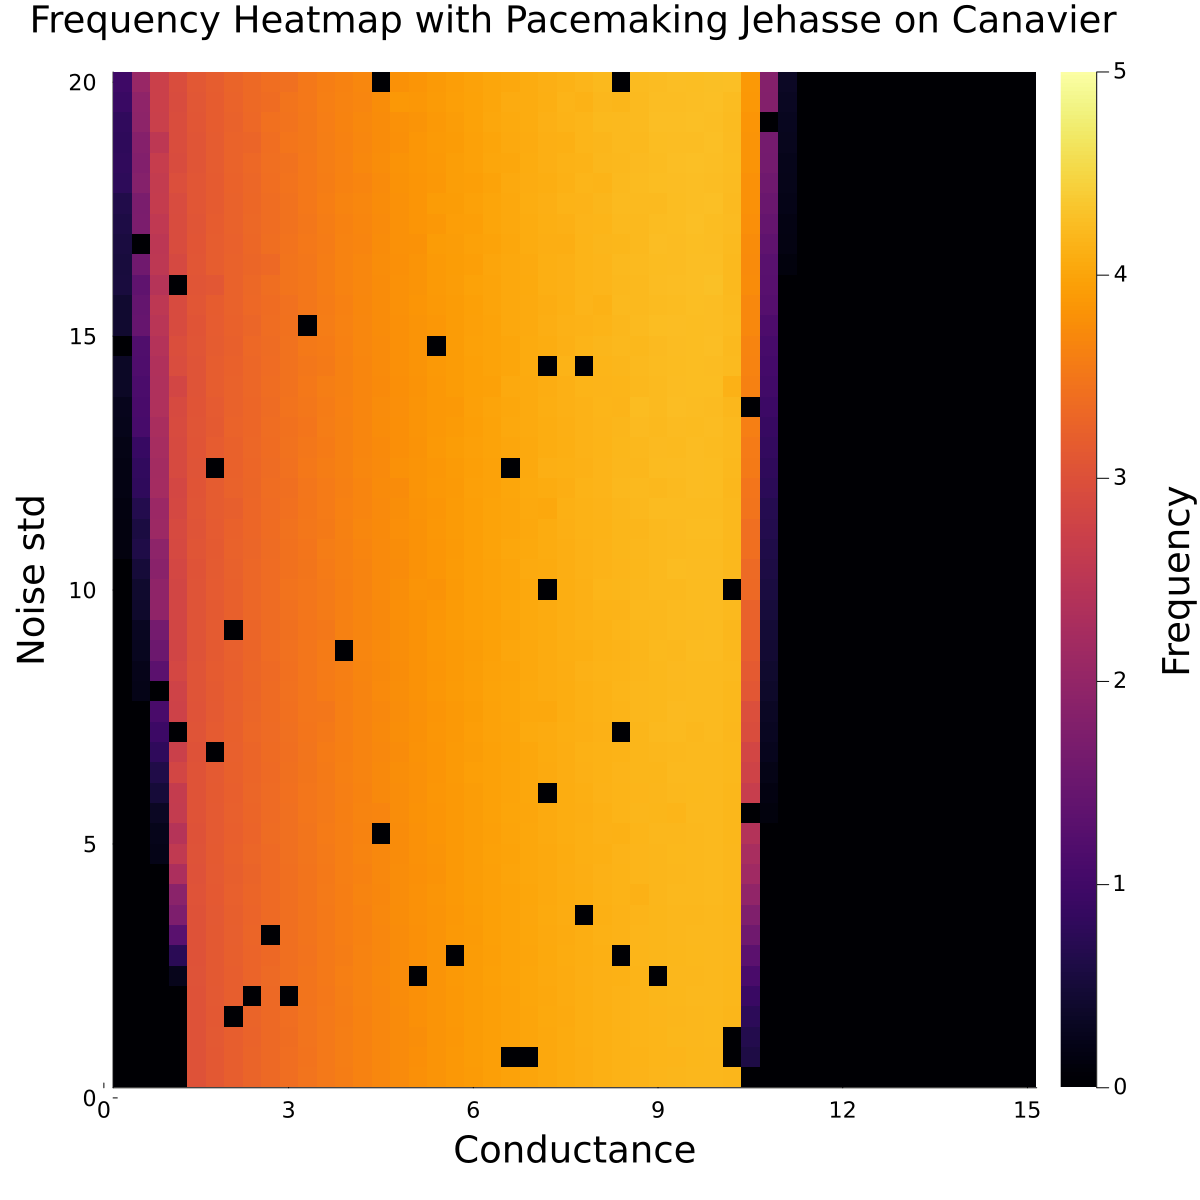

In [7]:
freqs_nonan = deepcopy(freqs)
freqs_nonan[isnan.(freqs)] .= 0
h = heatmap(freqs_nonan', 
    color=:inferno,              # Color scheme
    title="Frequency Heatmap with Pacemaking Jehasse on Canavier",  # Title
    xlabel="Conductance", ylabel="Noise std",  # Axis labels
    guidefontsize=25, tickfontsize=15, legendfontsize=25, titlefontsize=25, colorbar_titlefontsize=25,
    xticks=([0, 10, 20, 30, 40, 50], ["0", "3", "6", "9", "12", "15"]),     # Custom x-ticks
    yticks=([0, 12.5, 25, 37.5, 50], ["0", "5", "10", "15", "20"]),     # Custom y-ticks
    #aspect_ratio=:equal,          # Ensure square cells
    size=(1200, 1200),              # Size of the plot
    clims=(0, 5),
    colorbar_title="Frequency"   # Color bar label
)
# savefig(h, "heatmap_Canavier_g_and_noise.pdf")
# savefig(h, "heatmap_Canavier_g_and_noise.svg")

In [8]:
mean_ISIs = readdlm("./data/mean_ISIs_g_noise.dat")
freqs = 1000. ./ mean_ISIs
std_ISIs = readdlm("./data/std_ISIs_g_noise.dat");

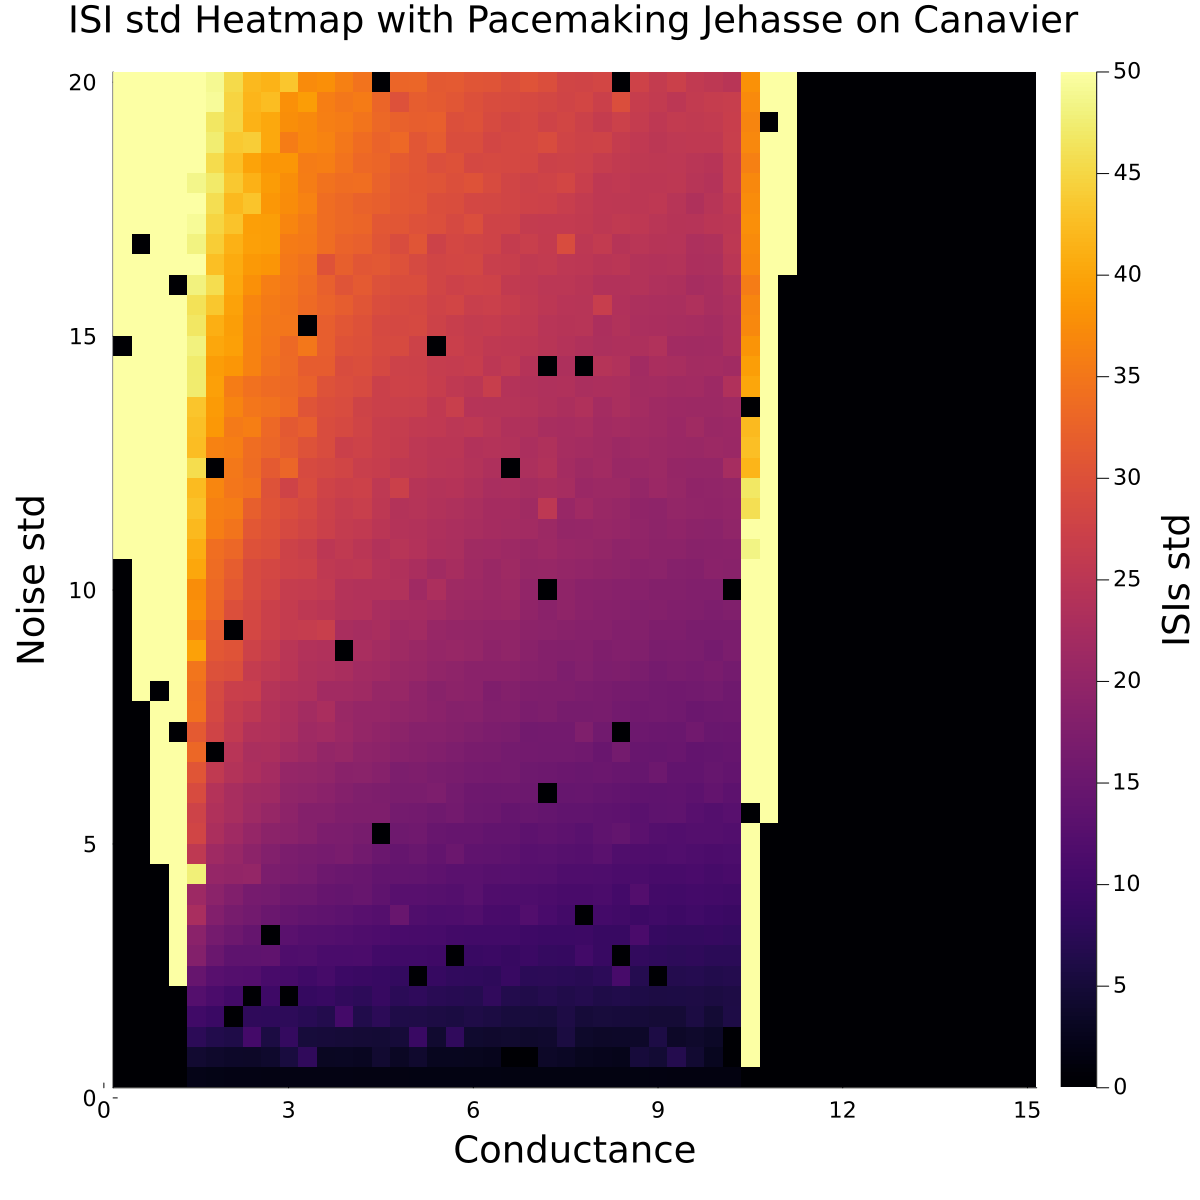

In [10]:
std_ISIs_nonan = deepcopy(std_ISIs)
std_ISIs_nonan[isnan.(std_ISIs)] .= 0
h = heatmap(std_ISIs_nonan', 
    color=:inferno,              # Color scheme
    title="ISI std Heatmap with Pacemaking Jehasse on Canavier",  # Title
    xlabel="Conductance", ylabel="Noise std",  # Axis labels
    guidefontsize=25, tickfontsize=15, legendfontsize=25, titlefontsize=25, colorbar_titlefontsize=25,
    xticks=([0, 10, 20, 30, 40, 50], ["0", "3", "6", "9", "12", "15"]),     # Custom x-ticks
    yticks=([0, 12.5, 25, 37.5, 50], ["0", "5", "10", "15", "20"]),     # Custom y-ticks
    #aspect_ratio=:equal,          # Ensure square cells
    size=(1200, 1200),              # Size of the plot
    clims=(0, 50),
    colorbar_title="ISIs std"   # Color bar label
)
# savefig(h, "heatmap_Canavier_g_and_noise_std_ISI.pdf")
# savefig(h, "heatmap_Canavier_g_and_noise_std_ISI.svg")

In [11]:
mean_ISIs = readdlm("./data/mean_ISIs_g_noise.dat")
freqs = 1000. ./ mean_ISIs
std_ISIs = readdlm("./data/std_ISIs_g_noise.dat");

In [12]:
CV_ISIs = 100 .* std_ISIs ./ mean_ISIs

50×50 Matrix{Float64}:
 NaN         NaN        NaN        NaN        …  122.595   128.48    126.693
 NaN         NaN        NaN        NaN            97.0722   94.3606   92.1476
 NaN         NaN        NaN        NaN            41.2861   38.9033   38.1173
 NaN         NaN        NaN        NaN            21.6299   22.1785   21.2001
   0.600866    1.27694    2.26553    2.96711      16.1112   16.3651   17.0936
   0.56955     1.19517    2.00463    2.84637  …   14.8101   15.6519   15.551
   0.557223    1.14118    1.94325  NaN            14.5597   14.5973   14.8352
   0.555052    1.14581    3.35241    2.5616       13.7466   13.9189   13.9988
   0.55645     1.2891     1.90935    2.59956      13.8379   14.3264   14.0787
   0.559249    1.80995    2.85279    2.59134      13.0157   13.1397   14.8222
   0.562675    2.74533    1.75526    2.47284  …   13.0279   13.7644   13.1142
   0.566303    1.05779    1.75731    2.29597      12.869    12.8867   13.5551
   0.569938    1.08272    1.72338    3.6861

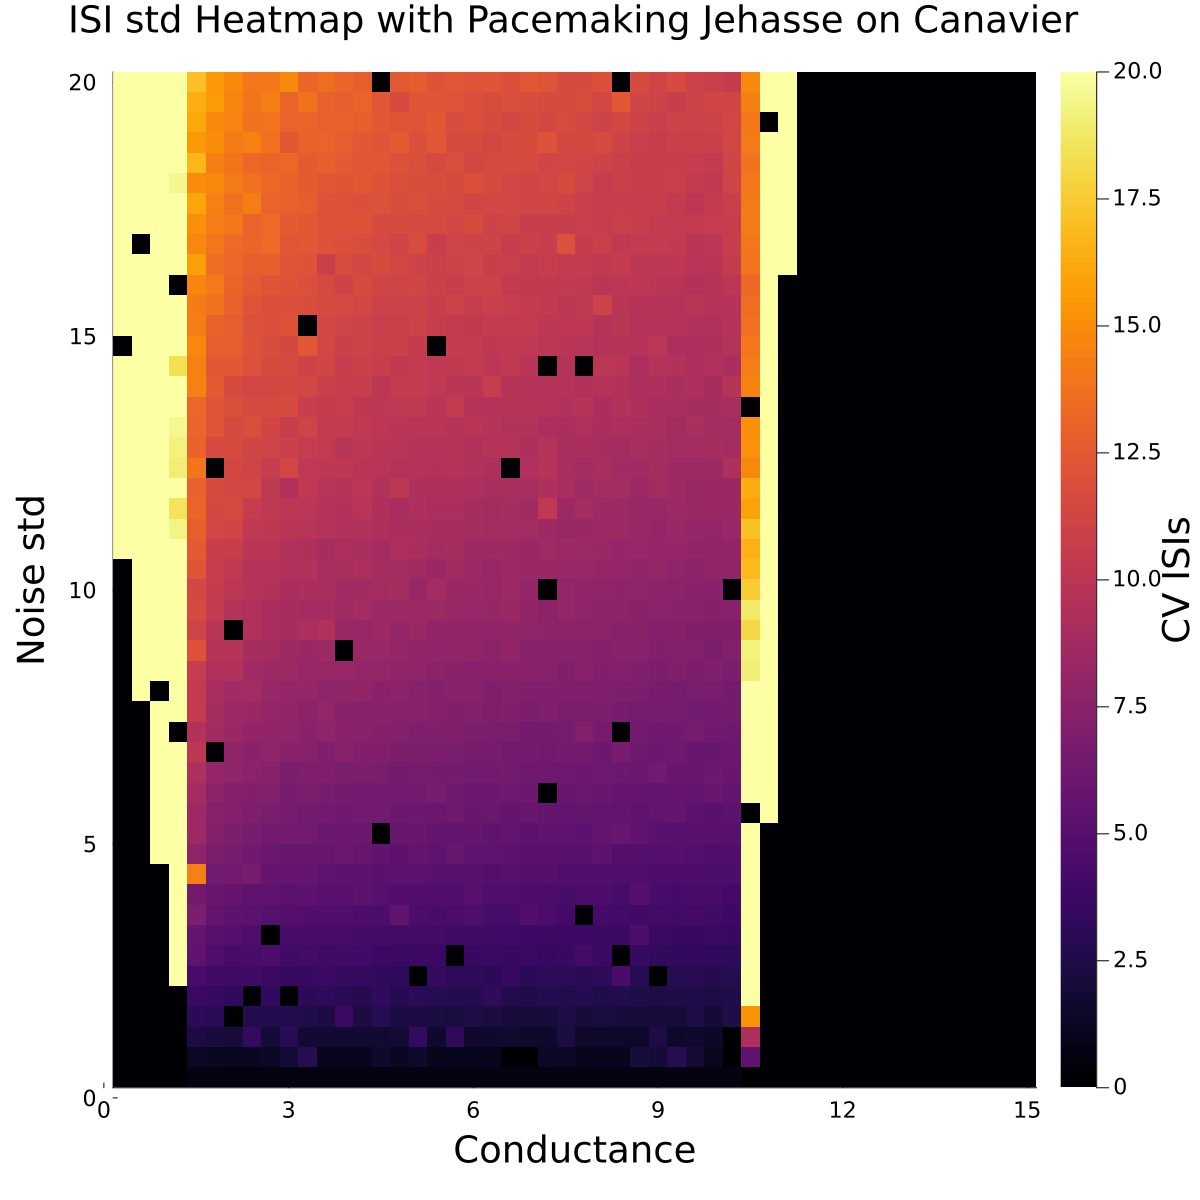

In [14]:
CV_ISIs_nonan = deepcopy(CV_ISIs)
CV_ISIs_nonan[isnan.(CV_ISIs)] .= 0
h = heatmap(CV_ISIs_nonan', 
    color=:inferno,              # Color scheme
    title="ISI std Heatmap with Pacemaking Jehasse on Canavier",  # Title
    xlabel="Conductance", ylabel="Noise std",  # Axis labels
    guidefontsize=25, tickfontsize=15, legendfontsize=25, titlefontsize=25, colorbar_titlefontsize=25,
    xticks=([0, 10, 20, 30, 40, 50], ["0", "3", "6", "9", "12", "15"]),     # Custom x-ticks
    yticks=([0, 12.5, 25, 37.5, 50], ["0", "5", "10", "15", "20"]),     # Custom y-ticks
    #aspect_ratio=:equal,          # Ensure square cells
    size=(1200, 1200),              # Size of the plot
    clims=(0, 20),
    colorbar_title="CV ISIs"   # Color bar label
)
# savefig(h, "heatmap_Canavier_g_and_noise_std_ISI.pdf")
# savefig(h, "heatmap_Canavier_g_and_noise_std_ISI.svg")